In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#open imdb basics tsv.gz files with tab delimiter
df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t') 

#print column headers
my_list = list(df)
print(my_list)



C:\Users\dange\AppData\Local\Temp\ipykernel_3440\3668112850.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t')


['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


In [8]:
#create second dataframe, extracting specific columns for analysis
df2 = df[['tconst', 'titleType', 'primaryTitle']]

#save df to csv for future use
#df2.to_csv('title_basics.csv')


In [9]:
df3 = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t')
print(df3.head)

<bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1921
1        tt0000002            5.8       260
2        tt0000003            6.5      1730
3        tt0000004            5.6       174
4        tt0000005            6.2      2544
...            ...            ...       ...
1243297  tt9916690            7.4         6
1243298  tt9916720            5.3       274
1243299  tt9916730            9.0         6
1243300  tt9916766            6.7        21
1243301  tt9916778            7.3        35

[1243302 rows x 3 columns]>


In [10]:
#merge extracted df and ratings df into one usable construct
df_merge = pd.merge(df2, df3, how = 'inner', on ='tconst')
print(df_merge.head)

<bound method NDFrame.head of             tconst  titleType                    primaryTitle  averageRating  \
0        tt0000001      short                      Carmencita            5.7   
1        tt0000002      short          Le clown et ses chiens            5.8   
2        tt0000003      short                  Pauvre Pierrot            6.5   
3        tt0000004      short                     Un bon bock            5.6   
4        tt0000005      short                Blacksmith Scene            6.2   
...            ...        ...                             ...            ...   
1243297  tt9916690  tvEpisode  Horrid Henry Delivers the Milk            7.4   
1243298  tt9916720      short                       The Nun 2            5.3   
1243299  tt9916730      movie                          6 Gunn            9.0   
1243300  tt9916766  tvEpisode                  Episode #10.15            6.7   
1243301  tt9916778  tvEpisode                          Escape            7.3   

         

In [13]:
# filter out all Non-movie rows
df_merge2 = df_merge[df_merge['titleType'] == 'movie']
print(df_merge2.head)

<bound method NDFrame.head of             tconst titleType                 primaryTitle  averageRating  \
8        tt0000009     movie                   Miss Jerry            5.2   
325      tt0000502     movie                     Bohemios            4.2   
357      tt0000574     movie  The Story of the Kelly Gang            6.0   
364      tt0000591     movie             The Prodigal Son            5.1   
378      tt0000615     movie           Robbery Under Arms            4.3   
...            ...       ...                          ...            ...   
1243280  tt9916270     movie     Il talento del calabrone            5.8   
1243283  tt9916362     movie                        Coven            6.4   
1243287  tt9916428     movie          The Secret of China            3.8   
1243290  tt9916538     movie          Kuambil Lagi Hatiku            8.3   
1243299  tt9916730     movie                       6 Gunn            9.0   

         numVotes  
8             200  
325            14

In [14]:
#start feature analysis here: length and shape of new dataframe/how much data do I have?
#dataset size
print(len(df_merge2)) 

#dataset shape
print(df_merge2.shape) 

282304
(282304, 5)


In [15]:
#Feature 2: Average ratings of dataset
df_ratings = df_merge2['averageRating'].mean() #find average or mean of averageRating column
print(df_ratings)

6.182014778394922


In [16]:
#Feature 3: all stats for this dataset
df_ratings2 = df_merge2.describe()
print(df_ratings2)

       averageRating      numVotes
count  282304.000000  2.823040e+05
mean        6.182015  3.561688e+03
std         1.362075  3.458187e+04
min         1.000000  5.000000e+00
25%         5.400000  1.900000e+01
50%         6.300000  6.000000e+01
75%         7.100000  3.070000e+02
max        10.000000  2.656326e+06


In [17]:
#Feature 3: Average of number of votes each title received
df_votes = df_merge2['numVotes'].mean()
print(df_votes)

3561.688077391748


In [18]:
# filter rows with average rating less than 7.5
df_filtered_rating = df_merge2[df_merge2['averageRating'] >= 7.5]
print(df_filtered_rating)

            tconst titleType                  primaryTitle  averageRating  \
1028     tt0002305     movie                 Life of Villa            7.7   
1252     tt0003386     movie                   Sodoms Ende            7.7   
1331     tt0003748     movie               Captain Alvarez            8.0   
1345     tt0003819     movie          Dance of the Vampire            7.6   
1413     tt0004167     movie                     Jane Eyre            7.6   
...            ...       ...                           ...            ...   
1243221  tt9914642     movie                     Albatross            8.3   
1243222  tt9914644     movie  9/11: Escape from the Towers            8.3   
1243259  tt9915872     movie          The Last White Witch            7.7   
1243290  tt9916538     movie           Kuambil Lagi Hatiku            8.3   
1243299  tt9916730     movie                        6 Gunn            9.0   

         numVotes  
1028           27  
1252           15  
1331           

In [19]:
#filter rows with average number of votes <= 75
df_filtered_votes = df_filtered_rating[df_filtered_rating['numVotes'] <= 75]
print(df_filtered_votes)

            tconst titleType          primaryTitle  averageRating  numVotes
1028     tt0002305     movie         Life of Villa            7.7        27
1252     tt0003386     movie           Sodoms Ende            7.7        15
1331     tt0003748     movie       Captain Alvarez            8.0        17
1345     tt0003819     movie  Dance of the Vampire            7.6        20
1413     tt0004167     movie             Jane Eyre            7.6        19
...            ...       ...                   ...            ...       ...
1243203  tt9913936     movie              Paradise            7.5        58
1243221  tt9914642     movie             Albatross            8.3        42
1243259  tt9915872     movie  The Last White Witch            7.7         8
1243290  tt9916538     movie   Kuambil Lagi Hatiku            8.3         6
1243299  tt9916730     movie                6 Gunn            9.0         6

[33801 rows x 5 columns]


In [20]:
#sort data in descending order and print head
sorted_df = df_filtered_votes.sort_values(by=['averageRating'], ascending=False)
print(sorted_df)

            tconst titleType                        primaryTitle  \
609904  tt13458442     movie          Vegan on a Jet Plane: Bali   
606365  tt13388966     movie                       A Better Life   
446993  tt10106416     movie           Honor Project Documentary   
635814  tt14051362     movie                                Raka   
955511   tt3835096     movie     The Film That Changed the World   
...            ...       ...                                 ...   
732854   tt1688465     movie               Terra Deu, Terra Come   
81080    tt0110007     movie                         Hei shan lu   
192333   tt0334231     movie         Reno: Rebel Without a Pause   
192340   tt0334262     movie                               Ru yi   
458714  tt10329696     movie  Self Discovery for Social Survival   

        averageRating  numVotes  
609904           10.0        13  
606365           10.0        55  
446993           10.0         8  
635814           10.0         8  
955511       

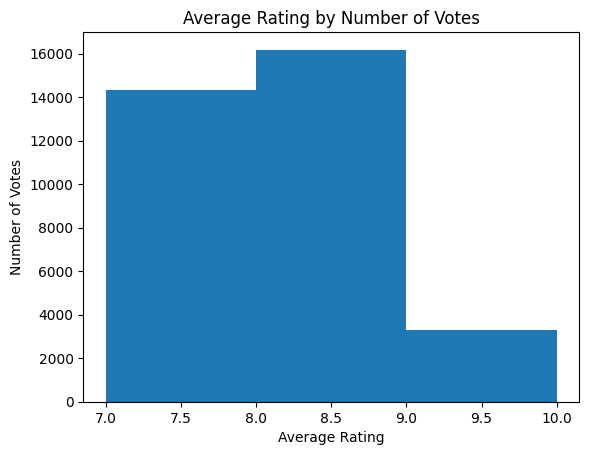

In [21]:
# create histogram of sorted data
plt.hist(sorted_df['averageRating'], bins=[7,8,9,10])

plt.title('Average Rating by Number of Votes')
plt.ylabel('Number of Votes')
plt.xlabel('Average Rating')
plt.show() 